# Insurance Factors Identification Project by Diptangshu Bhowmik


First we load the required data set and name it ins

In [1]:
ins<-read.csv("C:\\Users\\hp\\Downloads\\Insurance_factor_identification.csv",
              header = T)

# Question 1:

The committee is interested to know each field of the data collected through descriptive analysis.To gain basic insights into the data set and to prepare for further analysis.

In [2]:
summary(ins)

   Kilometres         Zone          Bonus            Make      
 Min.   :1.000   Min.   :1.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.00   1st Qu.:2.000   1st Qu.:3.000  
 Median :3.000   Median :4.00   Median :4.000   Median :5.000  
 Mean   :2.986   Mean   :3.97   Mean   :4.015   Mean   :4.992  
 3rd Qu.:4.000   3rd Qu.:6.00   3rd Qu.:6.000   3rd Qu.:7.000  
 Max.   :5.000   Max.   :7.00   Max.   :7.000   Max.   :9.000  
    Insured              Claims           Payment        
 Min.   :     0.01   Min.   :   0.00   Min.   :       0  
 1st Qu.:    21.61   1st Qu.:   1.00   1st Qu.:    2989  
 Median :    81.53   Median :   5.00   Median :   27404  
 Mean   :  1092.20   Mean   :  51.87   Mean   :  257008  
 3rd Qu.:   389.78   3rd Qu.:  21.00   3rd Qu.:  111954  
 Max.   :127687.27   Max.   :3338.00   Max.   :18245026  

# Question 2:

The total value of payment by an insurance company is an important factor to be monitored. So the committee has decided to find whether this payment is related to the number of claims and the number of insured policy years. They also want to visualize the results for better understanding. 

In [3]:
lm1<-lm(ins$Payment~ins$Claims+ins$Insured)
lm1


Call:
lm(formula = ins$Payment ~ ins$Claims + ins$Insured)

Coefficients:
(Intercept)   ins$Claims  ins$Insured  
    3250.74      4294.77        28.39  


In [4]:
summary(lm1)


Call:
lm(formula = ins$Payment ~ ins$Claims + ins$Insured)

Residuals:
    Min      1Q  Median      3Q     Max 
-799392  -12743   -3733   10591  861235 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3250.7447  1582.7077   2.054   0.0401 *  
ins$Claims  4294.7750    18.2819 234.920   <2e-16 ***
ins$Insured   28.3881     0.6514  43.580   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 71270 on 2179 degrees of freedom
Multiple R-squared:  0.9951,	Adjusted R-squared:  0.9951 
F-statistic: 2.211e+05 on 2 and 2179 DF,  p-value: < 2.2e-16


With linear we cant differentiate only tell if it is related strongly or not.

p-value of claims and isnured is less therefore this means significant role of both for the total payment.

In [5]:
cor(ins$Claims,ins$Payment)

[1] 0.9954003

99.54% positively corelated with payment.

In [6]:
cor(ins$Insured,ins$Payment)

[1] 0.933217

93.33% positively corelated insured with payment.

Plotting the results.

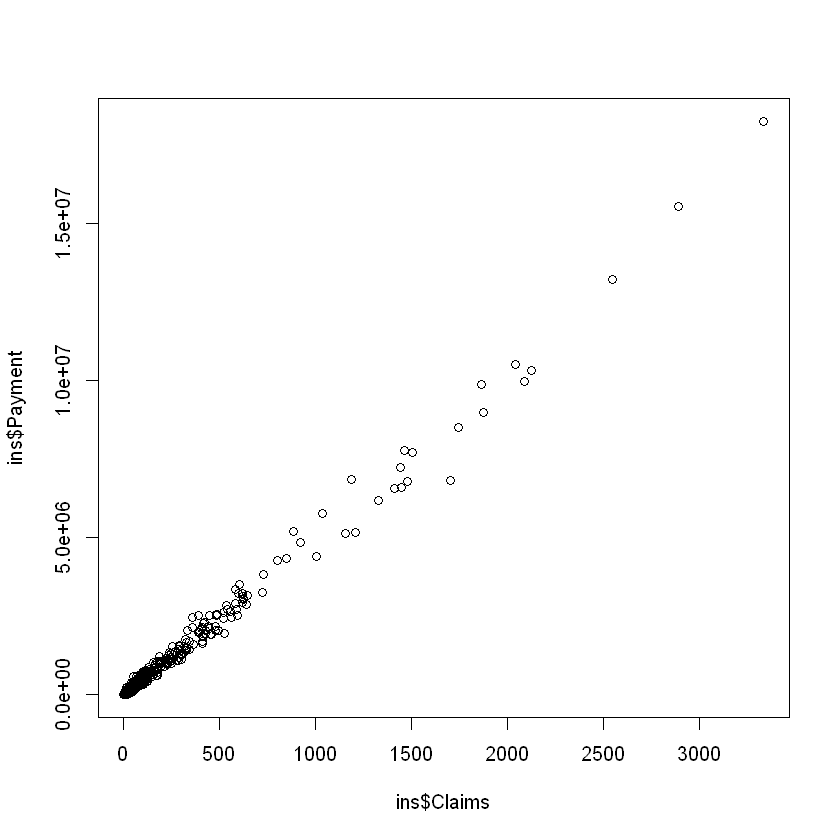

In [8]:
plot(ins$Claims,ins$Payment)

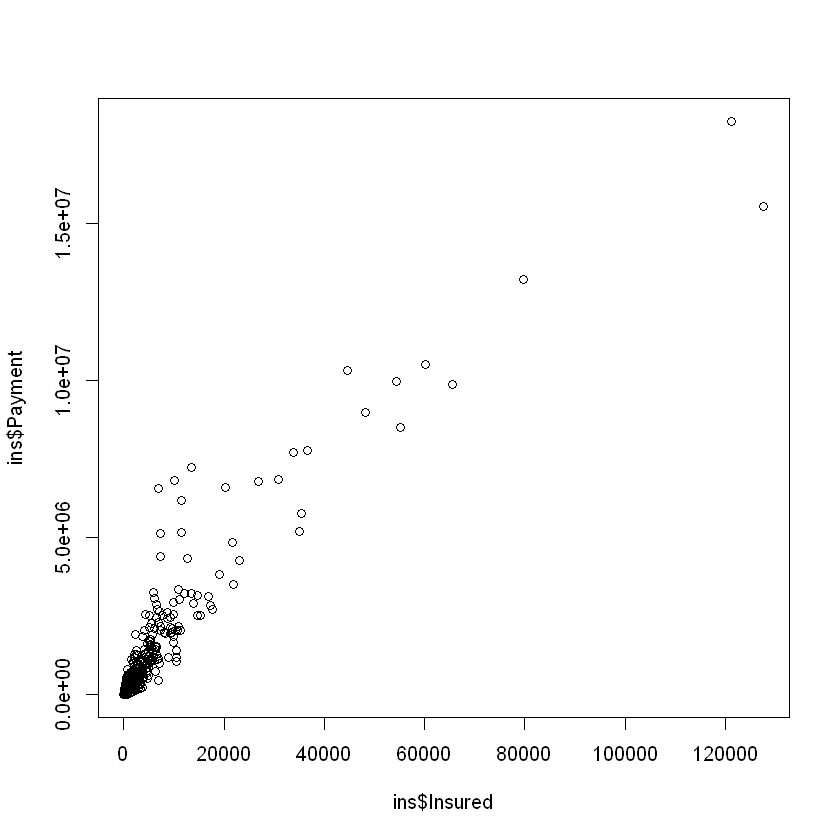

In [9]:
plot(ins$Insured,ins$Payment)

# Question 3:

The committee wants to figure out the reasons for insurance payment increase and decrease. So they have decided to find whether distance, location, bonus, make, and insured amount or claims are affecting the payment or all or some of these are affecting it. 

Here, Independent variable : insured, claims, make, bonus, zone and kilometers and for 
Dependent variable : payment

In [10]:
lm2<-lm(ins$Payment~.,data=ins)
summary(lm2)


Call:
lm(formula = ins$Payment ~ ., data = ins)

Residuals:
    Min      1Q  Median      3Q     Max 
-806775  -16943   -6321   11528  847015 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.173e+04  6.338e+03  -3.429 0.000617 ***
Kilometres   4.769e+03  1.086e+03   4.392 1.18e-05 ***
Zone         2.323e+03  7.735e+02   3.003 0.002703 ** 
Bonus        1.183e+03  7.737e+02   1.529 0.126462    
Make        -7.543e+02  6.107e+02  -1.235 0.216917    
Insured      2.788e+01  6.652e-01  41.913  < 2e-16 ***
Claims       4.316e+03  1.895e+01 227.793  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 70830 on 2175 degrees of freedom
Multiple R-squared:  0.9952,	Adjusted R-squared:  0.9952 
F-statistic: 7.462e+04 on 6 and 2175 DF,  p-value: < 2.2e-16


Except bonus and make, all are related where kilometer,insured,claims are strongly affecting.

# Question 4:

The insurance company is planning to establish a new branch office, so they are interested to find at what location, kilometre, and bonus level their insured amount, claims, and payment gets increased.

In [11]:
g_zone<-apply(ins[,c(5,6,7)], 2, function(x) tapply(x, ins$Zone, mean)) 
g_zone

Insured,Claims,Payment
1036.17175,73.568254,338518.95
1231.48184,67.625397,319921.52
1362.95870,63.295238,307550.85
2689.38041,101.311111,537071.76
384.80188,19.047923,93001.84
802.68457,32.577778,175528.47
64.91071,2.108844,9948.19


Zone 4 has the highest number of claims, and thus payment as well. 

Zones 1-4 have more insured years, claims, and payments.

In [12]:
g_kilo<-apply(ins[,c(5,6,7)],2,function(x)tapply(x,ins$Kilometres,mean))
g_kilo

Insured,Claims,Payment
1837.8163,75.59453,361899.35
1824.0288,89.27664,442523.78
1081.9714,54.16100,272012.58
398.9632,20.79493,108213.41
284.9475,18.04215,93306.12


kilometer group 2 has the maximum payments. Though the insured number of years is lesser than kilometre 1, the claims and payments are higher for group 2.

In [13]:
g_bonus<-apply(ins[,c(5,6,7)],2,function(x)tapply(x,ins$Bonus,mean))
g_bonus

Insured,Claims,Payment
525.5502,62.50489,282921.99
451.0754,34.23397,163316.62
397.4737,24.97419,122656.17
360.3867,20.35161,98498.12
437.3936,22.82109,108790.50
805.8167,39.94286,197723.82
4620.3728,157.22222,819322.48


Bonus group 7 has the highest number of claims and payment.

# Question 5:

The committee wants to understand what affects their claim rates so as to decide the right premiums for a certain set of situations. Hence, they need to find whether the insured amount, zone, kilometre, bonus, or make affects the claim rates and to what extent. 

In [14]:
reg<-lm(Claims~Kilometres+Zone+Bonus+Make+Insured,data=ins)
summary(reg)


Call:
lm(formula = Claims ~ Kilometres + Zone + Bonus + Make + Insured, 
    data = ins)

Residuals:
     Min       1Q   Median       3Q      Max 
-1214.57   -25.18    -9.41    10.04  1301.78 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.1230027  7.1270679   5.209 2.08e-07 ***
Kilometres  -3.9648601  1.2255209  -3.235  0.00123 ** 
Zone        -6.2924300  0.8647405  -7.277 4.75e-13 ***
Bonus       -4.2468101  0.8707236  -4.877 1.15e-06 ***
Make         6.7725342  0.6755390  10.025  < 2e-16 ***
Insured      0.0318697  0.0003158 100.933  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 80.14 on 2176 degrees of freedom
Multiple R-squared:  0.8425,	Adjusted R-squared:  0.8421 
F-statistic:  2328 on 5 and 2176 DF,  p-value: < 2.2e-16


Dependent variable: claims

Independent variable: kilometres, zone, bonus, make and insured

The results provides the intercept and estimated value and this in turn shows that all the p-values of independent variables, such as kilometres, zone, bonus, make and insured are highly significant and are making an impact on the claims. 